# Showing evaluation results
##### It's not fully accurate but gives an estimate for each method I coded [There were 3 levels easy, medium, hard with 5 links to find in each]
##### Some limitations
##### 1. The wiki links might be cached from previous run for same task, so subsequent traversal might seem faster
##### 2. Very small sample space used
##### You can check evalute.py to get an idea how I ran the experiment


In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open('evaluation_results.json', 'r') as f:
    data = json.load(f)    

In [8]:
naive_traversal = []
embedding_traversal = []
better_embedding_traversal = []


for _ in data:
    #based on traversal_method append to respective lists
    if _['traversal_method'] == 'naive_traversal':
        naive_traversal.append(_)
    elif _['traversal_method'] == 'embedding_traversal':
        embedding_traversal.append(_)
    elif _['traversal_method'] == 'better_embedding_traversal':
        better_embedding_traversal.append(_) 

#now for each based on difficulty see how many found, average time taken and average links traversed
def evaluate(traversal_list):
    difficulty_dict = {}
    for _ in traversal_list:
        difficulty = _['difficulty']
        if difficulty not in difficulty_dict:
            difficulty_dict[difficulty] = {
                'found_count': 0,
                'total_time': 0,
                'total_links': 0,
                'total_cases': 0
            }
        difficulty_dict[difficulty]['total_cases'] += 1
        if _['found']:
            difficulty_dict[difficulty]['found_count'] += 1
        difficulty_dict[difficulty]['total_time'] += _['time_taken']
        difficulty_dict[difficulty]['total_links'] += _['links_traversed']
    
    #calculate averages
    for difficulty in difficulty_dict:
        total_cases = difficulty_dict[difficulty]['total_cases']
        difficulty_dict[difficulty]['average_time'] = difficulty_dict[difficulty]['total_time'] / total_cases
        difficulty_dict[difficulty]['average_links'] = difficulty_dict[difficulty]['total_links'] / total_cases
    #remove total_time and total_links
        del difficulty_dict[difficulty]['total_time']
        del difficulty_dict[difficulty]['total_links']
    return difficulty_dict
naive_evaluation = evaluate(naive_traversal)
embedding_evaluation = evaluate(embedding_traversal)
better_embedding_evaluation = evaluate(better_embedding_traversal)
print("Naive Traversal Evaluation:")
print(naive_evaluation)
print("\nEmbedding Traversal Evaluation:")
print(embedding_evaluation)
print("\nBetter Embedding Traversal Evaluation:")
print(better_embedding_evaluation)


Naive Traversal Evaluation:
{'easy': {'found_count': 1, 'total_cases': 5, 'average_time': 22.196294593811036, 'average_links': 34.6}, 'medium': {'found_count': 0, 'total_cases': 5, 'average_time': 30.751816272735596, 'average_links': 41.0}, 'hard': {'found_count': 0, 'total_cases': 5, 'average_time': 37.69829363822937, 'average_links': 41.0}}

Embedding Traversal Evaluation:
{'easy': {'found_count': 3, 'total_cases': 5, 'average_time': 21.44272713661194, 'average_links': 24.8}, 'medium': {'found_count': 2, 'total_cases': 5, 'average_time': 23.215286254882812, 'average_links': 26.4}, 'hard': {'found_count': 4, 'total_cases': 5, 'average_time': 14.63331503868103, 'average_links': 18.8}}

Better Embedding Traversal Evaluation:
{'easy': {'found_count': 4, 'total_cases': 5, 'average_time': 26.44109477996826, 'average_links': 23.6}, 'medium': {'found_count': 3, 'total_cases': 5, 'average_time': 36.96705169677735, 'average_links': 29.2}, 'hard': {'found_count': 4, 'total_cases': 5, 'average_t

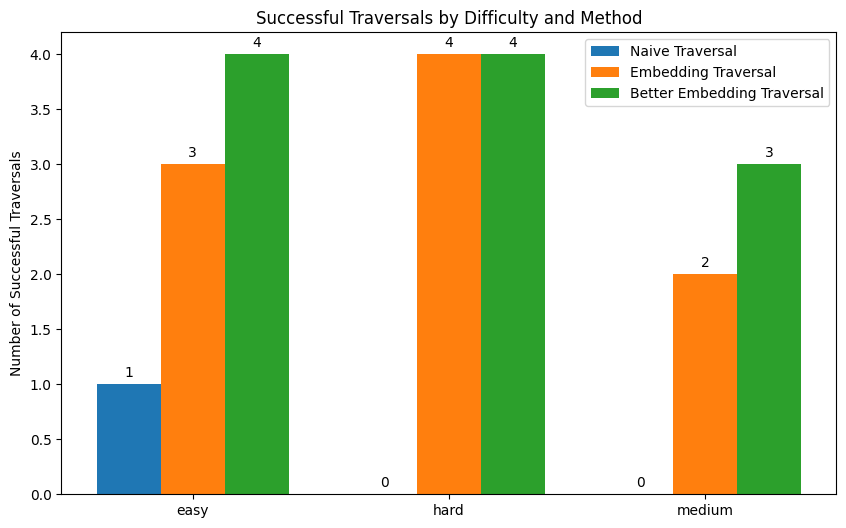

In [23]:
# Plotting number of successful traversals by difficulty for each method
difficulties = sorted(naive_evaluation.keys())
naive_found = [naive_evaluation[d]['found_count'] for d in difficulties]
embedding_found = [embedding_evaluation[d]['found_count'] for d in difficulties]
better_embedding_found = [better_embedding_evaluation[d]['found_count'] for d in difficulties] 
x = np.arange(len(difficulties))  
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, naive_found, width, label='Naive Traversal')
rects2 = ax.bar(x, embedding_found, width, label='Embedding Traversal')
rects3 = ax.bar(x + width, better_embedding_found, width, label='Better Embedding Traversal')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.set_ylabel('Number of Successful Traversals')
ax.set_title('Successful Traversals by Difficulty and Method')
ax.set_xticks(x)
ax.set_xticklabels(difficulties)
ax.legend()

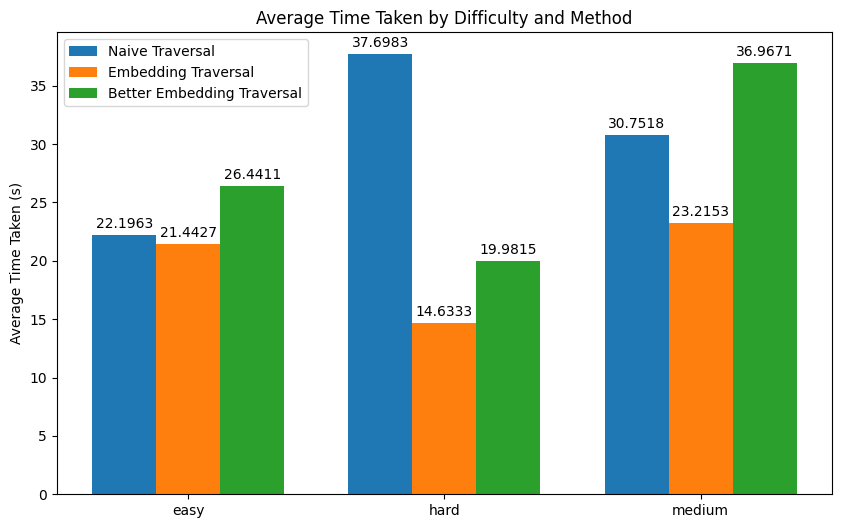

In [24]:
#Plot average time taken
naive_avg_time = [naive_evaluation[d]['average_time'] for d in difficulties]
embedding_avg_time = [embedding_evaluation[d]['average_time'] for d in difficulties]
better_embedding_avg_time = [better_embedding_evaluation[d]['average_time'] for d in difficulties]
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, naive_avg_time, width, label='Naive Traversal')
rects2 = ax.bar(x, embedding_avg_time, width, label='Embedding Traversal')
rects3 = ax.bar(x + width, better_embedding_avg_time, width, label='Better Embedding Traversal')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.set_ylabel('Average Time Taken (s)')
ax.set_title('Average Time Taken by Difficulty and Method')
ax.set_xticks(x)
ax.set_xticklabels(difficulties)
ax.legend()

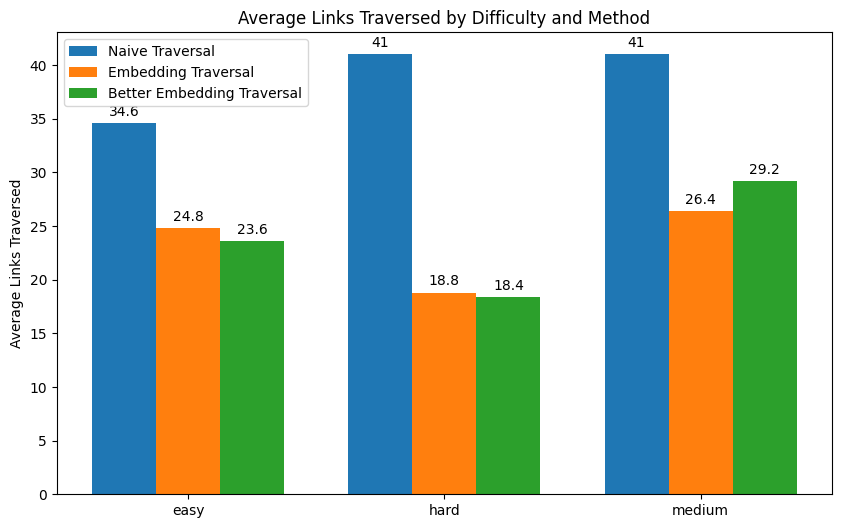

In [25]:
#Plot average links traversed
naive_avg_links = [naive_evaluation[d]['average_links'] for d in difficulties]
embedding_avg_links = [embedding_evaluation[d]['average_links'] for d in difficulties]
better_embedding_avg_links = [better_embedding_evaluation[d]['average_links'] for d in difficulties]
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, naive_avg_links, width, label='Naive Traversal')
rects2 = ax.bar(x, embedding_avg_links, width, label='Embedding Traversal')
rects3 = ax.bar(x + width, better_embedding_avg_links, width, label='Better Embedding Traversal')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.set_ylabel('Average Links Traversed')
ax.set_title('Average Links Traversed by Difficulty and Method')
ax.set_xticks(x)
ax.set_xticklabels(difficulties)
ax.legend()

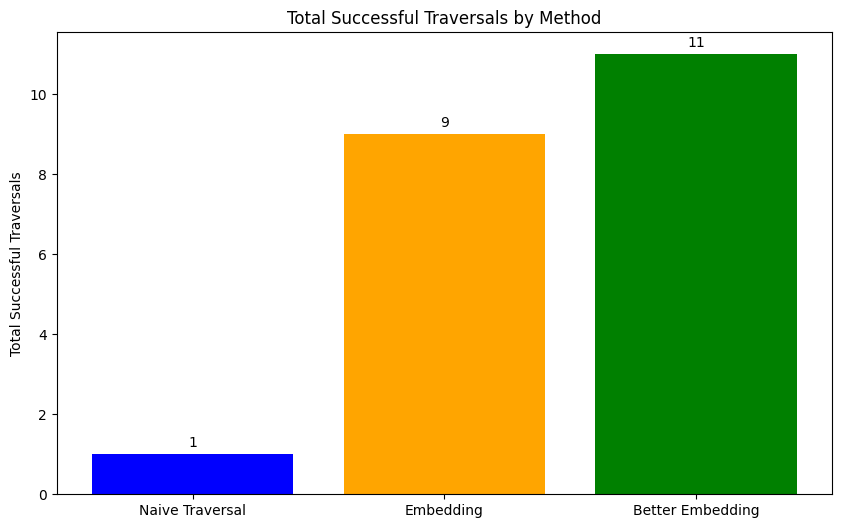

In [26]:
#Take sum of all successful traversals across difficulties for each method and plot
total_naive_found = sum(naive_found)
total_embedding_found = sum(embedding_found)
total_better_embedding_found = sum(better_embedding_found)
methods = ['Naive Traversal', 'Embedding', 'Better Embedding']
totals = [total_naive_found, total_embedding_found, total_better_embedding_found]
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(methods, totals, color=['blue', 'orange', 'green'])
ax.bar_label(bars, padding=3)
ax.set_ylabel('Total Successful Traversals')
ax.set_title('Total Successful Traversals by Method')
plt.show()


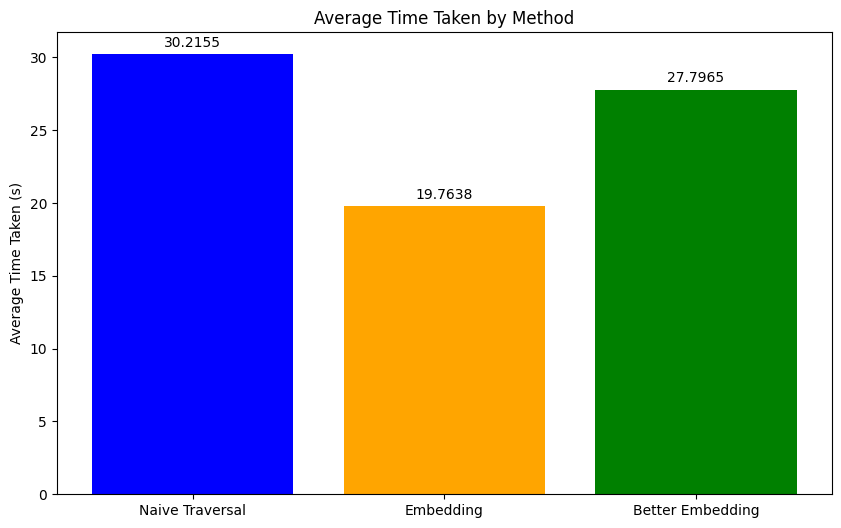

In [27]:
#average time taken across all difficulties for each method and plot

## I think caching caused embedding methods to be faster on average here
avg_naive_time = sum(naive_avg_time) / len(naive_avg_time)
avg_embedding_time = sum(embedding_avg_time) / len(embedding_avg_time)
avg_better_embedding_time = sum(better_embedding_avg_time) / len(better_embedding_avg_time)
methods = ['Naive Traversal', 'Embedding', 'Better Embedding']
avg_times = [avg_naive_time, avg_embedding_time, avg_better_embedding_time]
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(methods, avg_times, color=['blue', 'orange', 'green'])
ax.bar_label(bars, padding=3)
ax.set_ylabel('Average Time Taken (s)')
ax.set_title('Average Time Taken by Method')
plt.show()

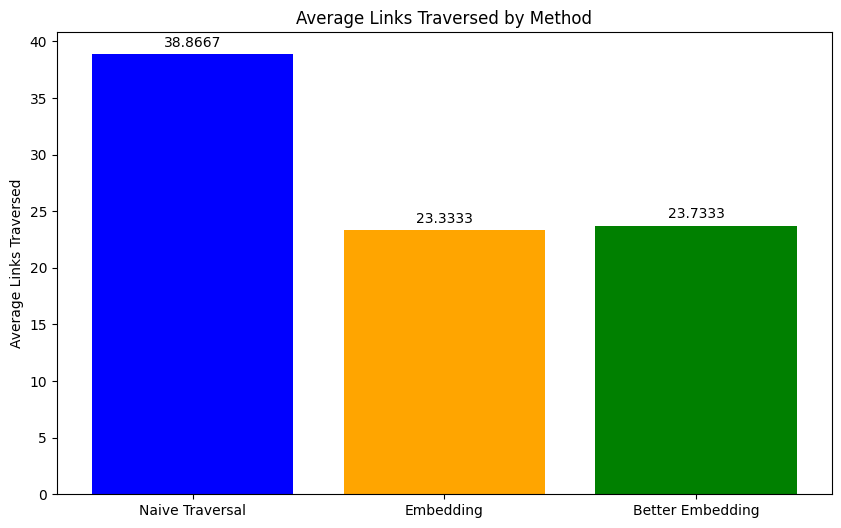

In [28]:
#Average links traversed across all difficulties for each method and plot
avg_naive_links = sum(naive_avg_links) / len(naive_avg_links)
avg_embedding_links = sum(embedding_avg_links) / len(embedding_avg_links)
avg_better_embedding_links = sum(better_embedding_avg_links) / len(better_embedding_avg_links)
methods = ['Naive Traversal', 'Embedding', 'Better Embedding']
avg_links = [avg_naive_links, avg_embedding_links, avg_better_embedding_links]
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(methods, avg_links, color=['blue', 'orange', 'green'])
ax.bar_label(bars, padding=3)
ax.set_ylabel('Average Links Traversed')
ax.set_title('Average Links Traversed by Method')
plt.show()